In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Loading FashionMNIST Dataset

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizing the Dataset

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

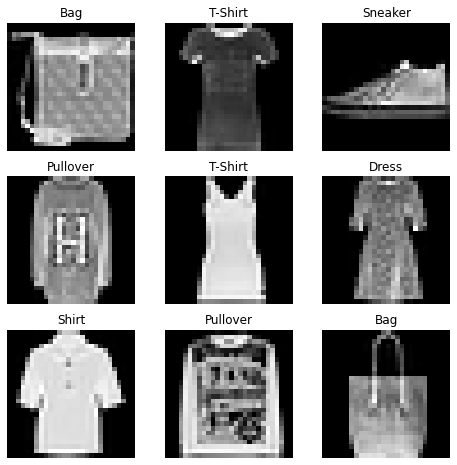

In [16]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## Creating a Custom Dataset

In [17]:
import os
import pandas as pd
from torchvision.io import read_image

In [18]:
class CustomIamgeDataset(Dataset):
    """
    A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. 
    """
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        #  labels are stored separately in a CSV file annotations_file
        self.img_labels = pd.read_csv(annotations_file)
        # images are stored in a direcory img_dir
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_dir)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            imgae = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing your data for training with Dataloaders

In [20]:
from torch.utils.data import DataLoader

In [21]:
training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [22]:
test_dataloader

## Iterate through the DataLoader

In [25]:
train_features, train_labels = next(iter(training_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


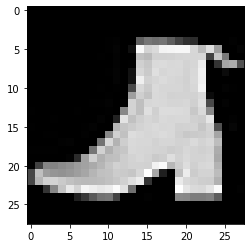

In [26]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()